# Import Data

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
import sys
from sqlalchemy import create_engine
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import numpy as np 


account = pd.read_csv("data/account.csv", sep=";")
card = pd.read_csv("data/card_dev.csv", sep=";")
client = pd.read_csv("data/client.csv", sep=";")
disposition = pd.read_csv("data/disp.csv", sep=";")
demograph = pd.read_csv("data/district.csv",sep=";")
loan = pd.read_csv("data/loan_dev.csv", sep=";")
transactions = pd.read_csv("data/trans_dev.csv",sep=";", low_memory=False)
merged_data = pd.read_csv("refined/final_data.csv", sep=";")

print(merged_data.shape)

(30373, 29)


# Split Data

In [2]:
def split_data(X, y, test_size):
    return train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Sampling

In [3]:
def smote_sampling(X_train, y_train):
    sm = SMOTE(random_state=42,k_neighbors=30)
    return sm.fit_resample(X_train, y_train)

# Fit and Predict

In [4]:
def fit_and_predict(model, X_train, y_train, X_test):
    model = model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    return prediction

# Calculate Statistics

In [5]:
def calculate_statistics(y_test, pred):
    accuracy = metrics.accuracy_score(y_test, pred)
    precision = metrics.precision_score(y_test, pred)
    recall = metrics.recall_score(y_test, pred)
    f1_score1 = metrics.f1_score(y_test, pred)
    auc = metrics.roc_auc_score(y_test, pred)
    log_loss = metrics.log_loss(y_test, pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score1}")
    print(f"AUC: {auc}")
    print(f"Log Loss: {log_loss}")
    

# Custom scorer to use on genetic algorithm

In [6]:
from sklearn.metrics import make_scorer

def roc_auc_custom_score(y_test, pred):
    
    auc = metrics.roc_auc_score(y_test, pred)

    return auc
   
    #print(f"AUC Score: {auc}")
    

# Confusion Matrix

In [7]:
def display_conf_matrix_graph(y_test, pred):
    conf_matrix = confusion_matrix(y_test, pred)
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["Not Paid", "Paid"])
    cm_display.plot()

# Aplication of a models

## Decision Tree

### Features : amount, duration and payments


Accuracy: 0.7575757575757576
Precision: 0.9090909090909091
Recall: 0.8045977011494253
F1-Score: 0.8536585365853658
AUC: 0.610632183908046
Log Loss: 8.373093238988563


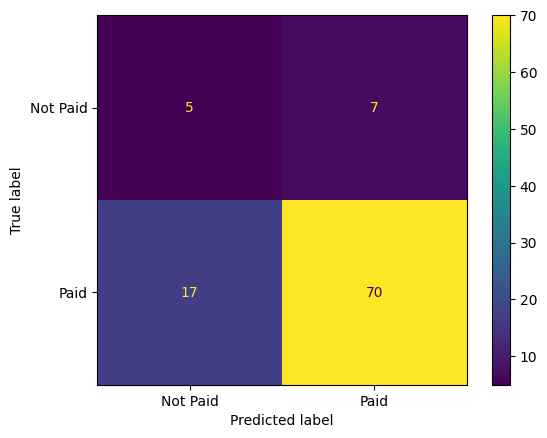

In [8]:

features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

### Features : merged data collumns names without string collumns that are not numerical

#### Merged Data

In [9]:

# exclude non-numeric columns
merged_data = merged_data.select_dtypes(exclude=['object'])
get_collumns_names = list(merged_data)
# drop loan_status 
for index in range(len(get_collumns_names)):
    if(get_collumns_names[index] == 'loan_status'):
        del get_collumns_names[index]
        break
print(get_collumns_names)
merged_data
save_loan_status = merged_data['loan_status']

['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']


Features:  ['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']
Accuracy: 0.706540825285338
Precision: 0.9245283018867925
Recall: 0.7436566279345507
F1-Score: 0.8242870285188593
AUC: 0.49424719302332254
Log Loss: 10.13576574559651


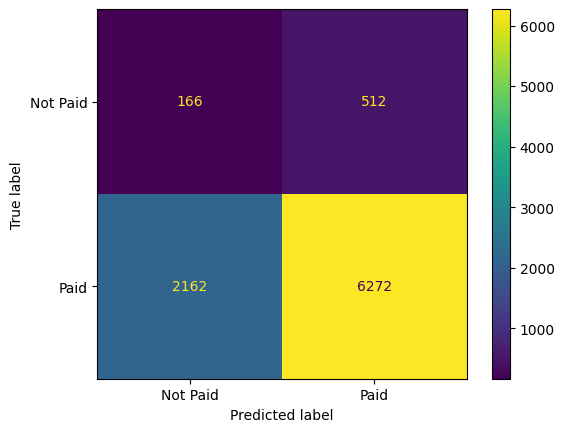

In [10]:

y = merged_data["loan_status"]
# drop loan_status from features ( obviously )
merged_data.drop(columns=["loan_status"], axis=1, inplace=True)

features = get_collumns_names
print("Features: ", features)
X = merged_data[features]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

We need to separate date birth day in 3 columns: day, month and year. 
We need to transform the categorical data in numerical data ( all ?!?)
Do this on data preparation and use refined data on data understanding.
The merged data, need to be sorted by date of loan ascending order. ( See this )

### Features : ft_feature_matrix_enc_md_2 from preparation phase

229    1
230    0
231    1
232    0
233    1
      ..
323    1
324    0
325    1
326    1
327    1
Name: loan_status, Length: 99, dtype: int64
0.7169540229885056
Accuracy: 0.8181818181818182
Precision: 0.9367088607594937
Recall: 0.8505747126436781
F1-Score: 0.891566265060241
AUC: 0.7169540229885056
Log Loss: 6.279817910055993

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree

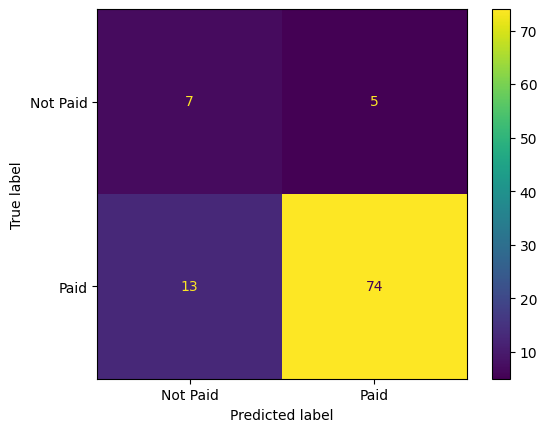

In [19]:

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
#ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna(axis="columns", how="any")
#print(ft_feature_matrix_enc_md_2)

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()
#print(y)
X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)



#X.drop(columns=["loand_id"], axis=1, inplace=True)



X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier( criterion="entropy", max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
prediction = fit_and_predict(dTree, X_train, y_train, X_test)
pred_prob1 = dTree.predict_proba(X_test)
#print(pred_prob1)
print(y_test)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
#calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)
calculate_statistics(y_test, prediction)


#XgBoost decision trees: hyperparameter tuning 

xgBoost = xgb.XGBClassifier()

xgBoost.fit(X_train, y_train)
print()
print(xgBoost)
print("XgBoost:\n ")
expected_y  = y_test
predicted_y = xgBoost.predict(X_test)
 
print(metrics.classification_report(expected_y, predicted_y))
calculate_statistics(expected_y, predicted_y)
print(metrics.confusion_matrix(expected_y, predicted_y))

# Using genetic algorithm to select best pipeline classificator

/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_255168/1723942402.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")


                                                                              
                                                                              
TPOT closed during evaluation in one generation.
                                                                              
                                                                              
TPOT closed prematurely. Will use the current best pipeline.
                                                                              
Best pipeline: BernoulliNB(FastICA(BernoulliNB(input_matrix, alpha=0.01, fit_prior=False), tol=0.9), alpha=0.1, fit_prior=False)


/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/home/wolfcuanhamarws/.local/lib/pytho

0.764367816091954
Accuracy: 0.5858585858585859
Precision: 1.0
Recall: 0.5287356321839081
F1-Score: 0.6917293233082707
AUC: 0.764367816091954
Log Loss: 14.303937698902402
Accuracy: 0.8787878787878788
Precision: 0.8787878787878788
Recall: 1.0
F1-Score: 0.9354838709677419
AUC: 0.5
Log Loss: 4.186615271798895


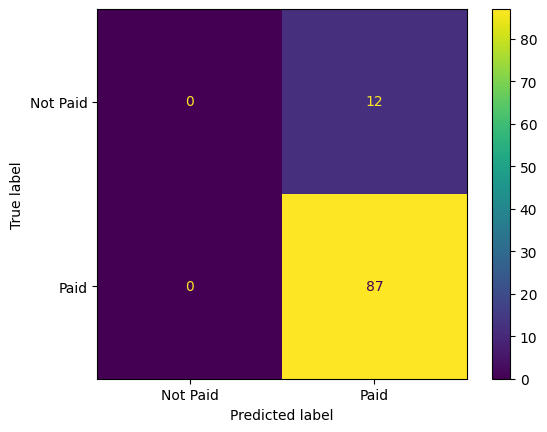

In [12]:

from tpot import TPOTClassifier
from sklearn.feature_selection import SelectPercentile, f_classif


import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.model_selection import train_test_split

ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.70, test_size=0.30,shuffle=False)

y= ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)


custom_scorer = make_scorer(roc_auc_custom_score, greater_is_better=True)
pipeline_optimizer = TPOTClassifier(generations=50, population_size=50, cv=5, random_state=42,
                                verbosity=2,warm_start=True,scoring= custom_scorer,n_jobs=2,periodic_checkpoint_folder="refined/tpot_checkpoints")

pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
calculate_statistics(y_test, pipeline_optimizer.predict(X_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')


#Best result from TPOT
# from sklearn.pipeline import make_pipeline

# exported_pipeline = make_pipeline(
#     SelectPercentile(score_func=f_classif, percentile=43),
#     SGDClassifier(alpha=0.001, eta0=1.0, fit_intercept=True, l1_ratio=0.5, learning_rate="constant", loss="hinge", penalty="elasticnet", power_t=0.0)
# )
# # Fix random state for all the steps in exported pipeline
# set_param_recursive(exported_pipeline.steps, 'random_state', 42)

# exported_pipeline.fit(X_train, y_train)
# results = exported_pipeline.predict(X_test)

# calculate_statistics(y_test, results)
# print(metrics.classification_report(expected_y, predicted_y))

#New best result from TPOT

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=SGDClassifier(alpha=0.0, eta0=1.0, fit_intercept=True, l1_ratio=0.25, learning_rate="constant", loss="hinge", penalty="elasticnet", power_t=0.5)),
    StackingEstimator(estimator=SGDClassifier(alpha=0.01, eta0=1.0, fit_intercept=True, l1_ratio=0.5, learning_rate="constant", loss="perceptron", penalty="elasticnet", power_t=1.0)),
    KNeighborsClassifier(n_neighbors=70, p=2, weights="uniform")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)

results = exported_pipeline.predict(X_test)
calculate_statistics(y_test, results)
display_conf_matrix_graph(y_test, results)



## Logistic Regression

### Features : amount, duration and payments

Accuracy: 0.494949494949495
Precision: 0.8627450980392157
Recall: 0.5057471264367817
F1-Score: 0.6376811594202899
AUC: 0.46120689655172414
Log Loss: 17.443882999268137


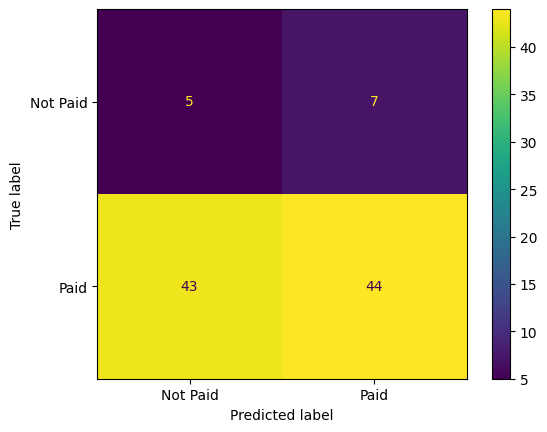

In [ ]:
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

logistic_regression = LogisticRegression()
prediction = fit_and_predict(logistic_regression, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

### Features : merged data collumns names without string collumns that are not numerical

In [ ]:

y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

Features:  ['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']


ValueError: Found input variables with inconsistent numbers of samples: [9112, 99]

### Features : ft_feature_matrix_enc_md_2 from preparation phase

Accuracy: 0.8787878787878788
Precision: 0.8787878787878788
Recall: 1.0
F1-Score: 0.9354838709677419
AUC: 0.5
Log Loss: 4.186615271798895


/tmp/ipykernel_116594/3004702232.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")


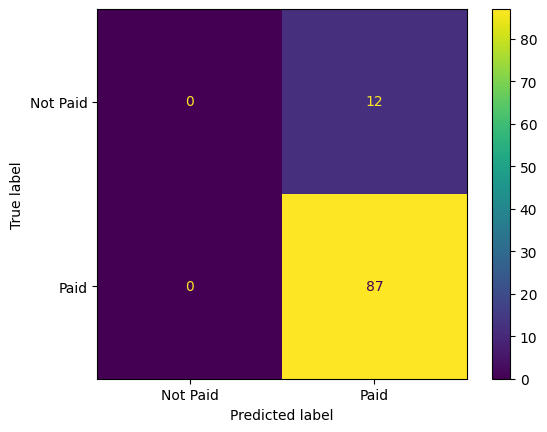

In [ ]:
from sklearn.model_selection import train_test_split

ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

#X_train, y_train = smote_sampling(X_train, y_train)

dTree = LogisticRegression()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

## Support Vector Machine - Linear

### Features : amount, duration and payments

In [ ]:
from sklearn import svm
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]
X= X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for C and gamma
svm_linear = svm.SVC(kernel='linear')
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

KeyboardInterrupt: 

### Features : ft_feature_matrix_enc_md_2 from preparation phase

/tmp/ipykernel_116594/2487927185.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")


Accuracy: 0.7070707070707071
Precision: 0.9833333333333333
Recall: 0.6781609195402298
F1-Score: 0.802721088435374
AUC: 0.7974137931034482
Log Loss: 10.117427424745859


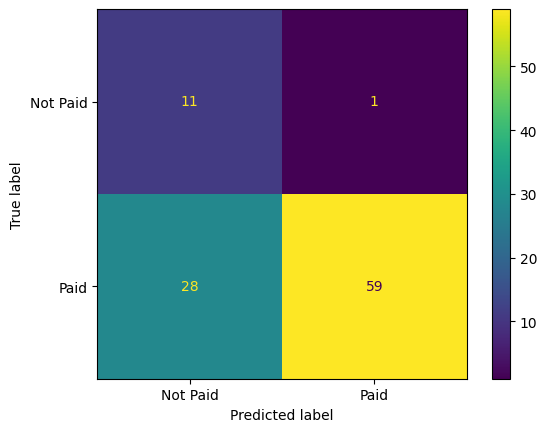

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")

features = ft_feature_matrix_enc_md_2.columns


y=ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)

svm_linear = svm.SVC(kernel='rbf')
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

A good idea is to tunne C, Gamma and Kernel parameters ( and others) depending on the data and the chosen SVM model.

### Features : merged data collumns names without string collumns that are not numerical

In [ ]:
y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]
X= X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM linear parameters
svm_linear = svm.SVC(kernel="linear")
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

## Support Vector Machine - Non Linear

### Features : amount, duration and payments

In [ ]:
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]
# Use numpy matrix to improve performance
X= X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM non-linear parameters
svm_non_linear = svm.SVC(kernel="rbf")
prediction = fit_and_predict(svm_non_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

What is happening with the data? Why the model is not working?

### Features : merged data collumns names without string collumns that are not numerical

We need parameters tuning and better feature selection, data preparation and or data understanding.
Check on all models what is the positive and negative class and the confusion matrix not random ! Data sorted by date of loan ascending order. ( See this )
Experimentar várias estratégias de sampling, como por exemplo, undersampling, oversampling, SMOTE, etc.
Validatin after test, not before. ( See this ) ?!!?
Featuring enginnering, feature selection !!!! ( See this )
Descriptive modeling : clustering, PCA, etc. ( See this )
No fundo: passar por todos os passos das teóricas de data mining, e ver o que se pode fazer para melhorar os resultados. ( See this )
Tests with different models, and different parameters. ( See this )
Tests need to be about loans in the future comparing with the data training !!!!
New feature: loan amount / duration
New feature: loan amount / payments
New feature: loan amount / payments / duration
New feature: number of clients with the same account with loan
New feature: try to calculate "taxa de esforço" ou algo parecido
New feature : get month balance, calculate the average and compare with the loan month payment -> sum the value of the loan payment
Maybe delete the type of transaction !!!
-> See the formulas used by banks !!!
See account_frequency: meaning and maybe changing to numerical values

/tmp/ipykernel_93632/619107745.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")


     loan_id  account.MAX(loan.loan_status)  account.MEAN(loan.loan_status)  \
0       5314                            0.0                             0.0   
1       5316                            1.0                             1.0   
2       6863                            1.0                             1.0   
3       5325                            1.0                             1.0   
4       7240                            1.0                             1.0   
..       ...                            ...                             ...   
323     6818                            1.0                             1.0   
324     5625                            0.0                             0.0   
325     6805                            1.0                             1.0   
326     7233                            1.0                             1.0   
327     7308                            1.0                             1.0   

     account.SUM(loan.loan_status)  account.MIN(loa

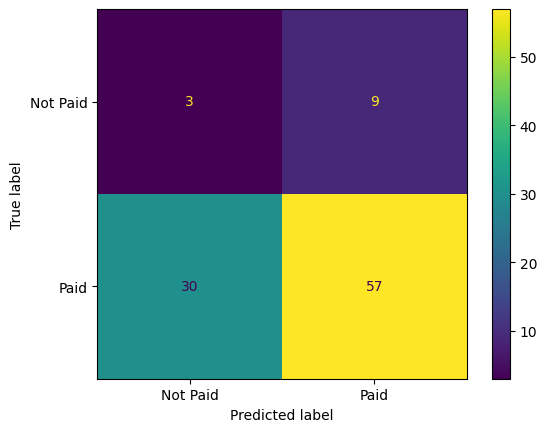

In [ ]:
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)
model= KNeighborsClassifier(n_neighbors=1)
prediction = fit_and_predict(model, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

# Using genetic algorithm to select best pipeline classificator

/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Accuracy: 0.9390243902439024
Precision: 0.9615384615384616
Recall: 0.974025974025974
F1-Score: 0.967741935483871
AUC: 0.6870129870129871
Log Loss: 2.1060522044737087


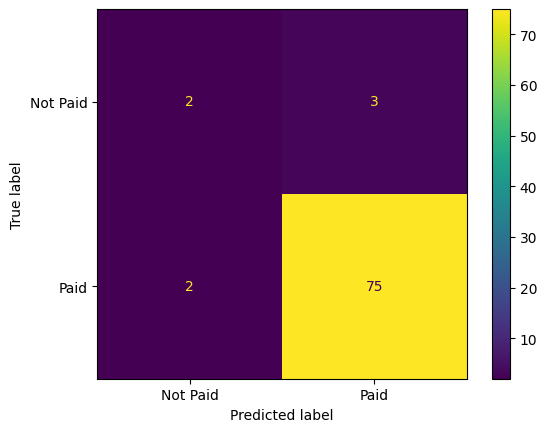

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from imblearn.over_sampling import SVMSMOTE 
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", dtype=np.float64)
features = tpot_data.drop('loan_status', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['loan_status'],shuffle=False)
            
training_features, training_target= smote_sampling(X_train, y_train)

# smote = SVMSMOTE(random_state=42, k_neighbors=20)
# training_features, training_target = smote.fit_resample(training_features, training_target )


# Average CV score on the training set was: 0.8043956043956044
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=MultinomialNB(alpha=0.001, fit_prior=False)),
    MinMaxScaler(),
    SGDClassifier(alpha=0.001, eta0=0.1, fit_intercept=True, l1_ratio=0.25, learning_rate="constant", loss="perceptron", penalty="elasticnet", power_t=100.0)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

calculate_statistics(testing_target, results)
display_conf_matrix_graph(testing_target, results)

Accuracy: 0.8414634146341463
Precision: 0.9848484848484849
Recall: 0.8441558441558441
F1-Score: 0.9090909090909091
AUC: 0.8220779220779221
Log Loss: 5.475669423552063
Accuracy: 0.7317073170731707
Precision: 0.9824561403508771
Recall: 0.7272727272727273
F1-Score: 0.835820895522388
AUC: 0.7636363636363637
Log Loss: 9.2665107351886


/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


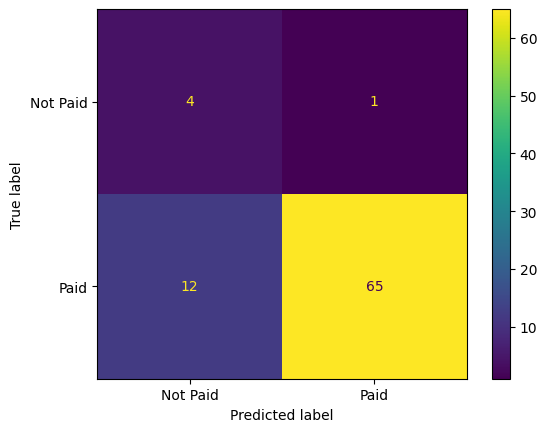

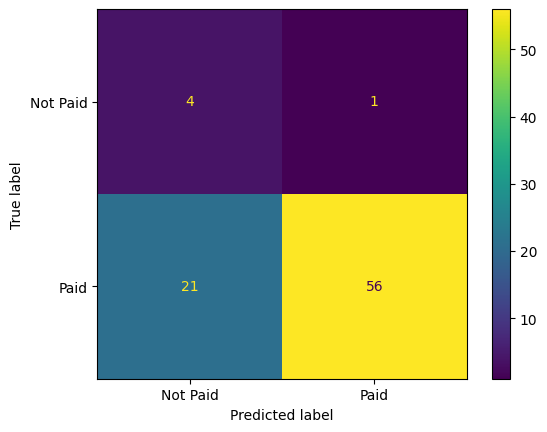

In [24]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from imblearn.over_sampling import SVMSMOTE 


tpot_data = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", dtype=np.float64)
features = tpot_data.drop('loan_status', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['loan_status'],shuffle=False)
            
            
training_features, training_target= smote_sampling(training_features, training_target)

# smote = SVMSMOTE(random_state=42)
# training_features, training_target = smote.fit_resample(training_features, training_target )



exported_pipeline = MLPClassifier(alpha=0.001, learning_rate_init=1.0)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
calculate_statistics(testing_target, results)
display_conf_matrix_graph(testing_target, results)



# Average CV score on the training set was: 0.860866910866911
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=BernoulliNB(alpha=0.1, fit_prior=True)),
    PCA(iterated_power=7, svd_solver="randomized"),
    SelectPercentile(score_func=f_classif, percentile=57),
    KNeighborsClassifier(n_neighbors=70, p=2, weights="uniform")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

calculate_statistics(testing_target, results)
display_conf_matrix_graph(testing_target, results)